In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from ipywidgets import interactive


In [134]:
data = pd.read_csv('supermarket_sales_Sheet1.csv')

In [135]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [136]:
data.shape

(1000, 17)

In [137]:
#Possibility to change types to save memory
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [139]:
data.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [140]:
data['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [141]:
data['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [142]:
data['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [143]:
data['Gender'] = data['Gender'].astype('category')
data['Customer type'] = data['Customer type'].astype('category')
data['City'] = data['City'].astype('category')
data['Payment'] = data['Payment'].astype('category')
data['Branch']= data['Branch'].astype('category')

In [144]:
data['Date'] = pd.to_datetime(data['Date'], format = "%m/%d/%Y")

In [145]:
data['day'] = (data['Date']).dt.day
data['month'] = (data['Date']).dt.month
data['year'] = (data['Date']).dt.year

In [146]:
#Memory usage reduced by 20%
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   category      
 2   City                     1000 non-null   category      
 3   Customer type            1000 non-null   category      
 4   Gender                   1000 non-null   category      
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

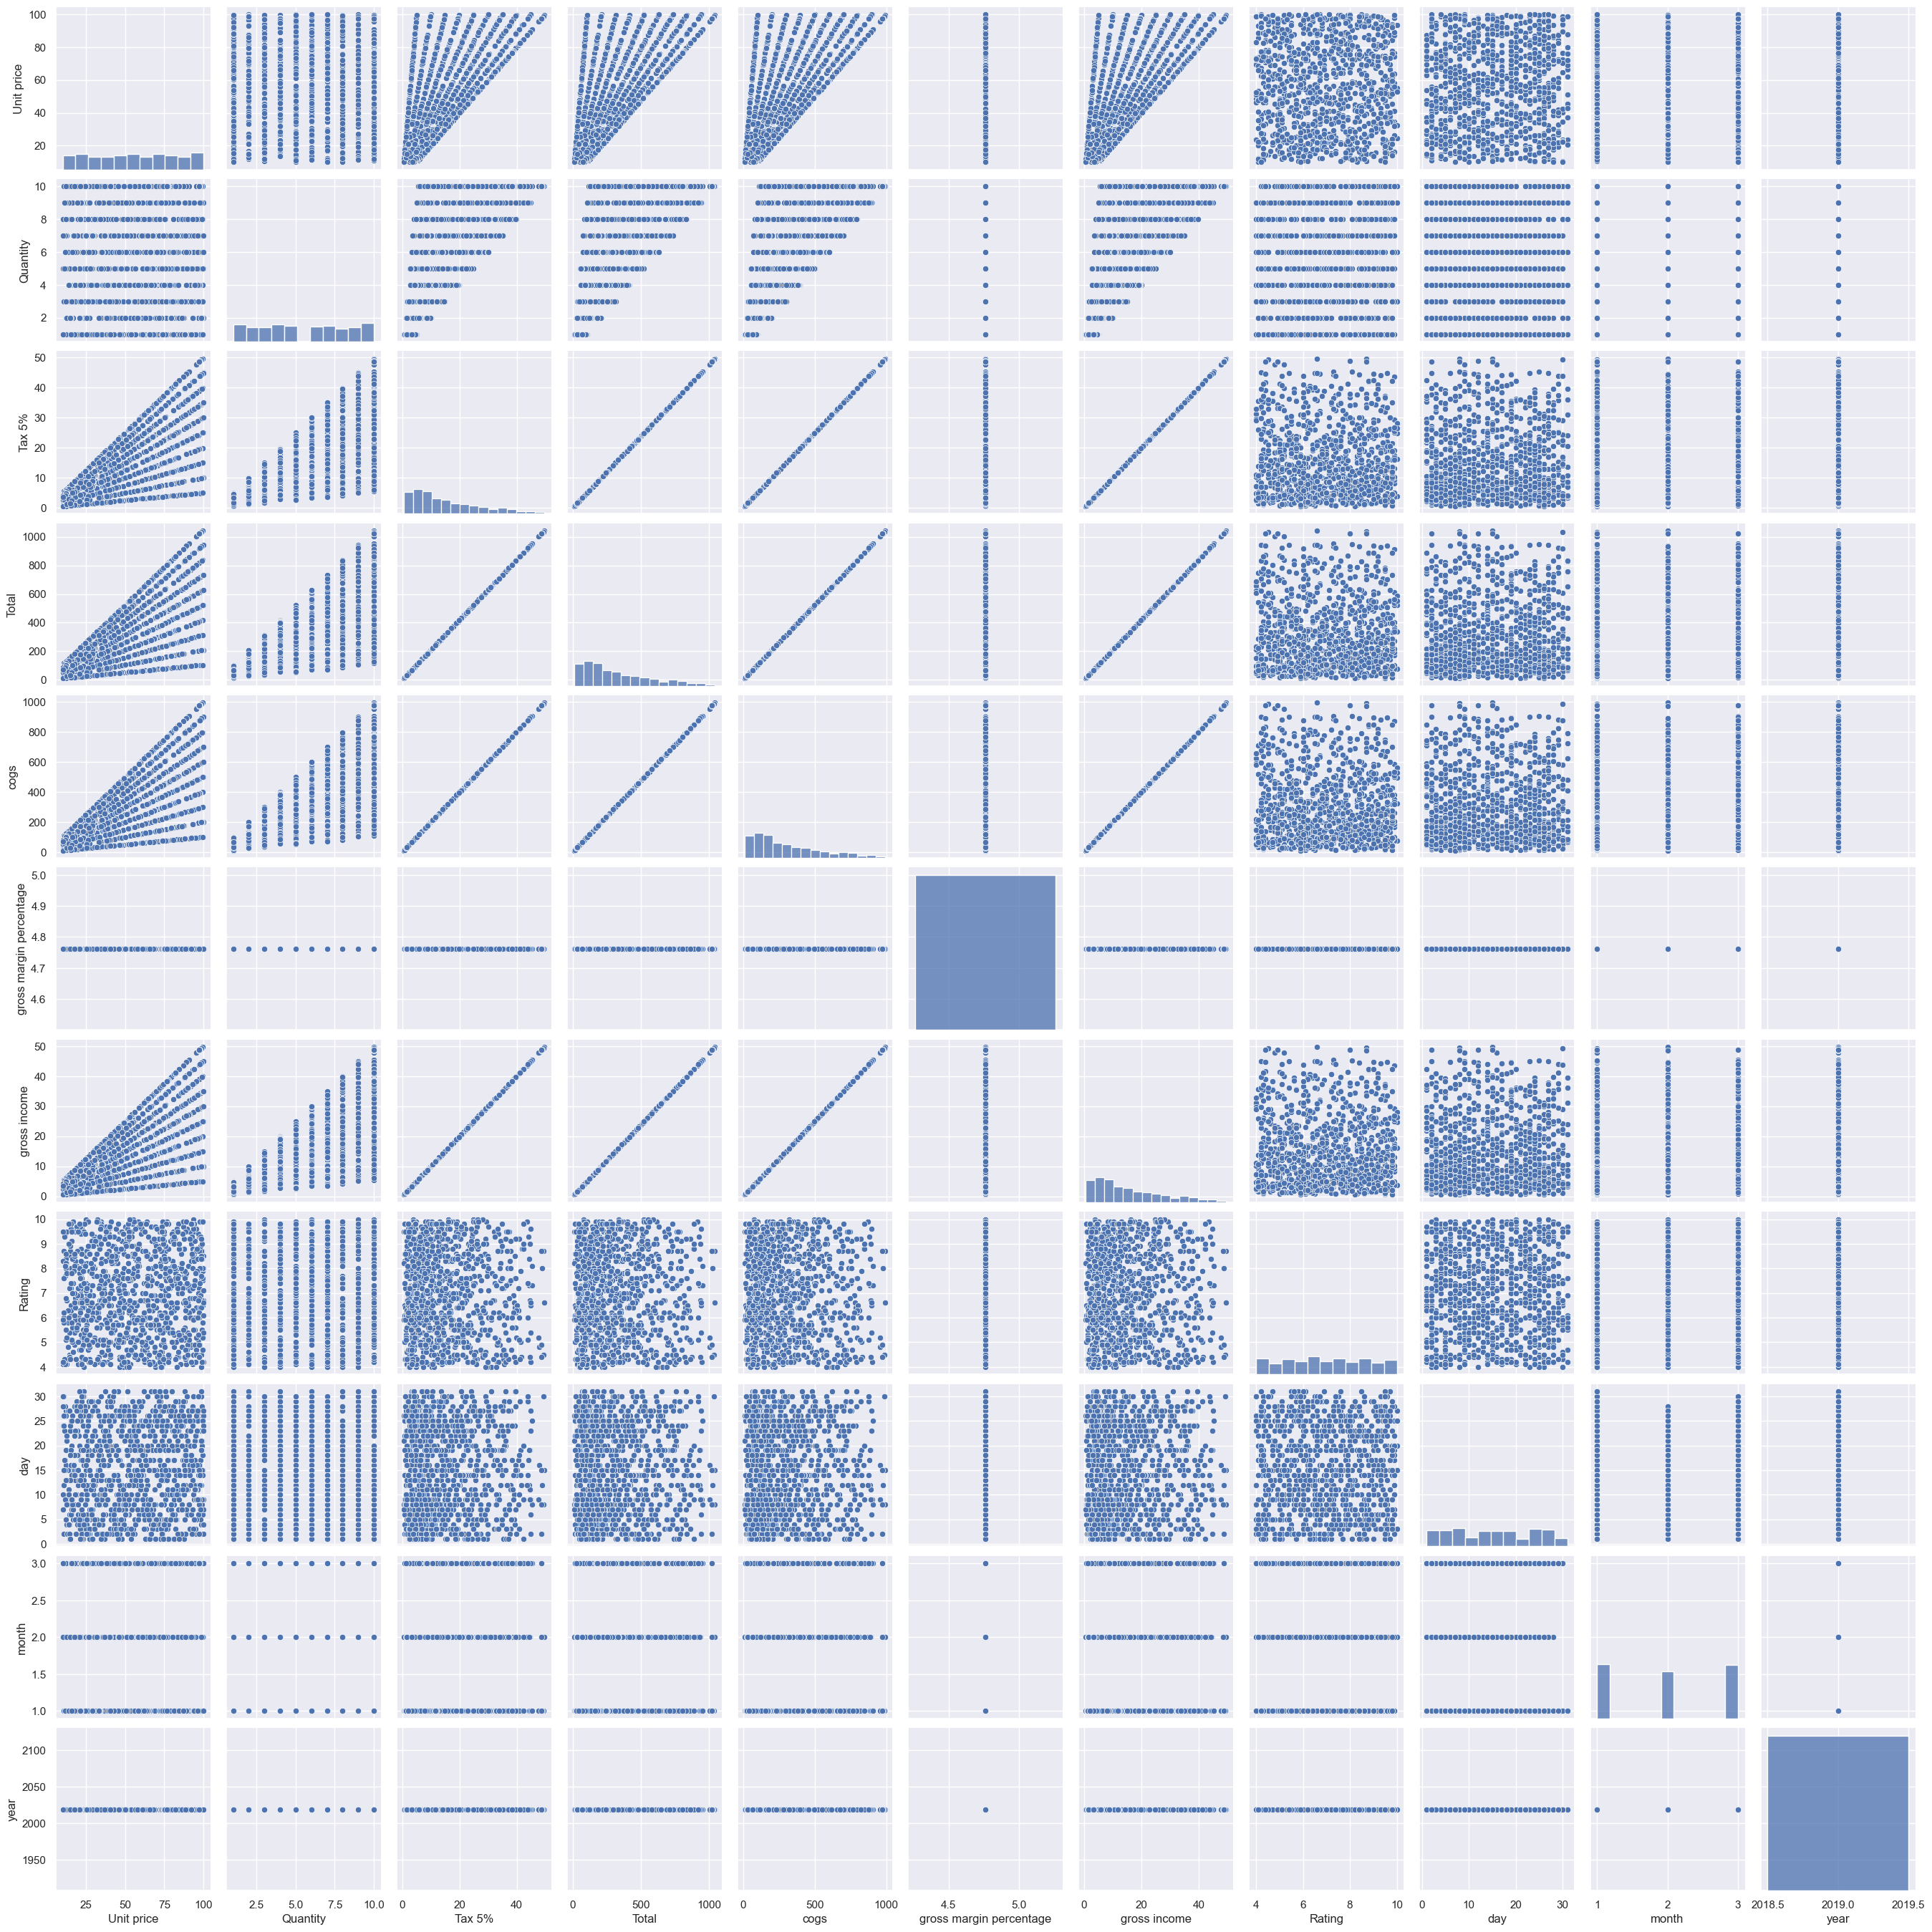

In [147]:
sns.pairplot(data)
plt.show()

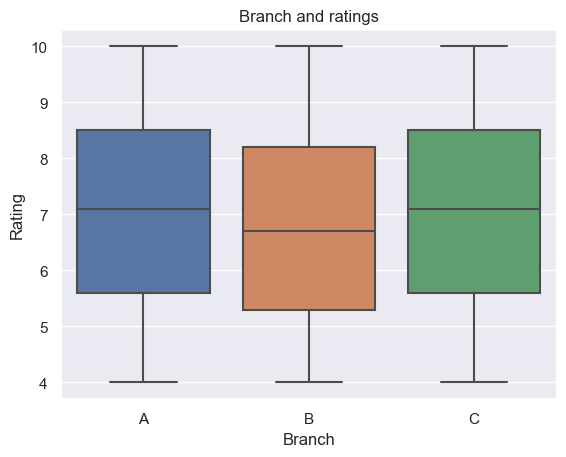

In [154]:
sns.boxplot(data=data,x='Branch',y='Rating')
plt.title('Branch and ratings')
plt.show()

In [155]:
def plot_countplot(branch):
    plt.figure(figsize=(8, 6))
    if branch == 'All':
        sns.countplot(data=data, x='Branch')
        plt.title('Branch count')
    else:
        sns.countplot(data=data[data['Branch'] == branch], x='Branch', hue='Gender')
        plt.title(f'Branch {branch} by Gender')
    plt.show()

#Branch selection
branch_dropdown = widgets.Dropdown(
    options=['All'] + list(data['Branch'].unique()),
    value='All',
    description='Branch:',
    disabled=False,
)

#Create an interactive display to chose the branch and see the gender analysis in it.
interact(plot_countplot, branch=branch_dropdown)
plt.show()

interactive(children=(Dropdown(description='Branch:', options=('All', 'A', 'C', 'B'), value='All'), Output()),…

In [151]:
#Function to generate catplot based on selected gender
def plot_catplot(gender):
    sns.catplot(data=data[data['Gender'] == gender], x='Product line', y='Unit price', hue='Gender', kind='swarm', legend_out=False, aspect=3)
    plt.show()

#Dropdown widget to select gender (Male or Female)
gender_dropdown = widgets.Dropdown(
    options=['Male', 'Female'],
    value='Male',
    description='Gender:',
    disabled=False,
)

#Interactive display
interactive_plot = interactive(plot_catplot, gender=gender_dropdown)
interactive_plot


interactive(children=(Dropdown(description='Gender:', options=('Male', 'Female'), value='Male'), Output()), _d…

In [152]:
correlation_matrix = np.corrcoef(data[['Unit price', 'Quantity', 'Tax 5%', 'Total']], rowvar=False)
fig = px.imshow(correlation_matrix, x=['Unit price', 'Quantity', 'Tax 5%', 'Total'], y=['Unit price', 'Quantity', 'Tax 5%', 'Total'])
fig.update_layout(title='Interactive Heatmap')
fig.show()

In [153]:
#Abilitiy to choose gander to see the graph
male_trace = go.Scatter3d(
    x=data[data['Gender'] == 'Male']['Unit price'],
    y=data[data['Gender'] == 'Male']['Quantity'],
    z=data[data['Gender'] == 'Male']['Total'],
    mode='markers',
    marker=dict(color='blue', size=5),
    name='Male'
)

female_trace = go.Scatter3d(
    x=data[data['Gender'] == 'Female']['Unit price'],
    y=data[data['Gender'] == 'Female']['Quantity'],
    z=data[data['Gender'] == 'Female']['Total'],
    mode='markers',
    marker=dict(color='red', size=5),
    name='Female'
)

#Create button actions, so after using them graph will present the value that users wanted
buttons = [
    dict(label='All', method='update', args=[{'visible': [True, True]}]),
    dict(label='Male', method='update', args=[{'visible': [True, False]}]),
    dict(label='Female', method='update', args=[{'visible': [False, True]}])
]

#Layout with buttons
layout = go.Layout(
    title='Interactive 3D Scatter Plot',
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True,
            x=1.05,
            xanchor='left',
            y=1,
            yanchor='top'
        )
    ]
)
fig = px.scatter_3d(data, x='Unit price', y='Quantity', z='Total', color='Gender')
fig.update_layout(title='Interactive 3D Scatter Plot')
fig.show()